# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [37]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

%matplotlib inline

In [2]:
# Example importing the CSV here
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df_raw.to_csv('/home/jgayoso/ml/linear-regresion-project-tutorial/data/raw/medical_insurance_cost.csv')

In [3]:
df_raw.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Analizar el balanceo en variables categóricas

# Sex
df_raw['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
# Smokers
df_raw['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
# Smokers
df_raw['smoker'].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [9]:
# Region
df_raw['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

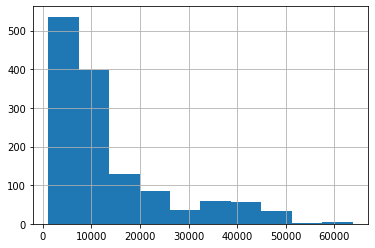

In [10]:
# Analizar la variable objetivo (charges)
df_raw['charges'].hist()
plt.show()

In [11]:
# Charges Boxplot
#px.df.tips()
fig = px.box(df_raw, y="charges")
fig.show()

In [12]:
# Boxplot charges según sexo
fig = px.box(df_raw, x="sex", y="charges")
fig.show()

Comportamiento similar entre hombres y mujeres

In [13]:
# Boxplot charges según región
fig = px.box(df_raw, x="region", y="charges")
fig.show()

Comportamiento similar entre regiones

In [14]:
# Boxplot charges según si fuma
fig = px.box(df_raw, x="smoker", y="charges")
fig.show()

Se observa un comportamiento desigual por smoker

In [15]:
# Boxplot charges según children
fig = px.box(df_raw, x="children", y="charges")
fig.show()

Pequeño crecimiento al principio en base a la cantidad de hijos. Muy pocos datos para 5 hijos.

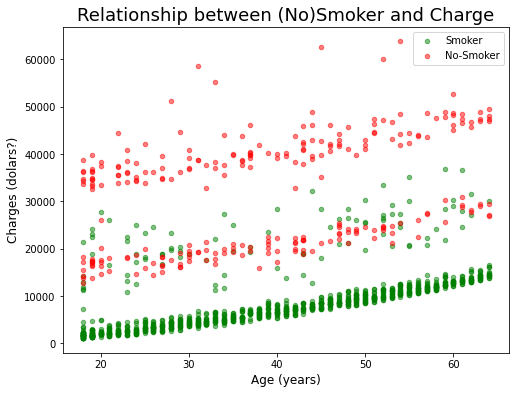

In [16]:
# Scatter plots: Age vs Charge by smoker
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='age', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='age', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['Smoker', 'No-Smoker'])
plt.title('Relationship between (No)Smoker and Charge', size=18)
plt.xlabel('Age (years)', size=12)
plt.ylabel('Charges (dolars?)', size=12);

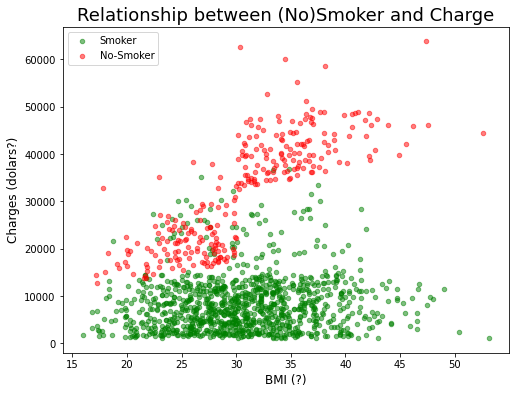

In [17]:
# Scatter plots: bmi vs Charge by smoker
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='bmi', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='bmi', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['Smoker', 'No-Smoker'])
plt.title('Relationship between (No)Smoker and Charge', size=18)
plt.xlabel('BMI (?)', size=12)
plt.ylabel('Charges (dolars?)', size=12);

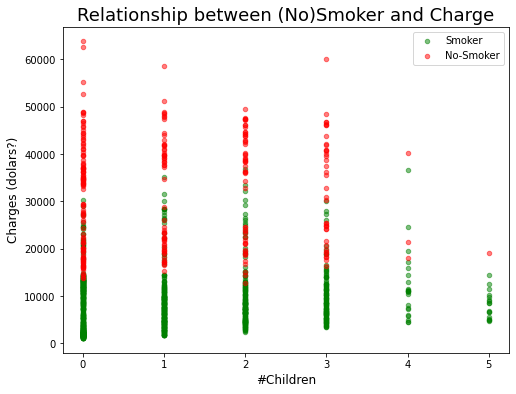

In [18]:
# Scatter plots: Children vs Charge by smoker
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='children', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='children', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['Smoker', 'No-Smoker'])
plt.title('Relationship between (No)Smoker and Charge', size=18)
plt.xlabel('#Children', size=12)
plt.ylabel('Charges (dolars?)', size=12);

In [19]:
df_raw['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
df_interim = df_raw.copy()

In [21]:
# Reemplazo categóricas por números
# Sex
df_interim['sex'] = df_interim['sex'].apply(lambda x: 1 if x == 'male' else 0)
df_interim['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [22]:
df_interim.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
5,31,0,25.740,0,no,southeast,3756.62160
6,46,0,33.440,1,no,southeast,8240.58960


In [23]:
def conv_region(region) :
    if region == 'southwest' :
        return 1
    elif region == 'southeast' :
        return 2
    elif region == 'northwest' :
        return 3
    elif region == 'northeast' :
        return 4
    else :
        return 'BadRegion'

In [24]:
# Región
df_interim['region'] = df_interim.apply(lambda x: conv_region(x['region']), axis=1)
df_interim['region'].value_counts()

2    364
1    325
3    325
4    324
Name: region, dtype: int64

In [25]:
# Smoker
df_interim['smoker'] = df_interim['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [26]:
df_interim.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960


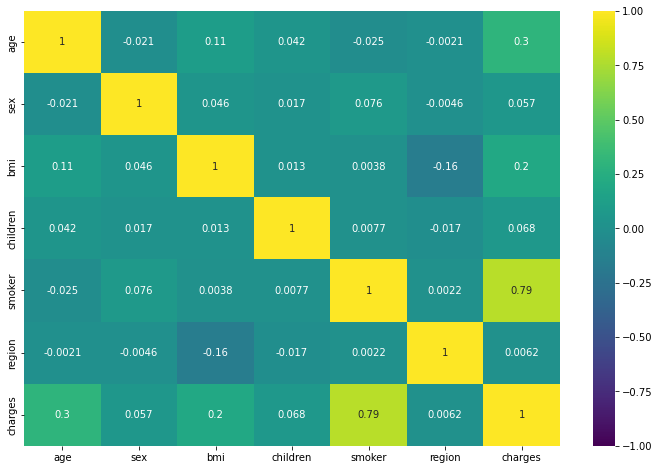

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_interim.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)
plt.show()

Remove charge outliers

Modelos regresión lineal

In [28]:
df_processed = df_interim.copy()
df_interim.to_csv('/home/jgayoso/ml/linear-regresion-project-tutorial/data/interim/medical_insurance_cost_interim.csv')

In [29]:
# Regresión Lineal Simple (una var ind y una var dep)
X = df_processed.drop(['charges'], axis=1)
y = df_processed['charges']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [31]:
# Estimación del modelo
LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

print(LR.score(X_test,y_test))

0.7989255552370544


In [32]:
print('Intercept: \n', LR.intercept_)
print('Coefficients: \n', LR.coef_)

Intercept: 
 -13131.689944122625
Coefficients: 
 [2.57980672e+02 1.69044897e+01 3.33284653e+02 5.25225710e+02
 2.37858534e+04 3.19300174e+02]


In [41]:
#save model:
joblib.dump(LR, '../models/lr_ensurance.pkl')

['../models/lr_ensurance.pkl']

In [33]:
edad = 33
sex = 1
bm = 22
children = 0
smoker = 1
region = 3

In [34]:
print('Predicted prima : \n', LR.predict([[edad, sex, bm, children, smoker, region]]))

Predicted prima : 
 [27474.59301401]


/home/jgayoso/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [35]:
# EJEMPLO
variables = ['sex','smoker','region','cage','cbmi','children']

# data distribution analysys
print('Data distribution analisys')
for v in variables:
    data = data.sort_values(by=[v])
    data[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Data distribution analisys


NameError: name 'data' is not defined